### **Код, приведенный в вебинаре "Байесовское А/B-тестирование // Демо-занятие курса «Machine Learning. Advanced»" (OTUS Онлайн-образование)**

In [1]:
import numpy as np
import pymc as pm
import arviz as az

In [2]:
n_samples = 200
true_p_a = 0.05
true_p_b = 0.05

In [3]:
data_A = np.random.binomial(1, true_p_a, size=n_samples)
data_B = np.random.binomial(1, true_p_b, size=n_samples)
print('Sample means:')
print(f'Blue: {data_A.mean():.3%}')
print(f'Red: {data_B.mean():.3%}')

Sample means:
Blue: 3.500%
Red: 3.000%


In [4]:
prior_alpha = [5, 5]
prior_beta = [100, 100]

In [5]:
with pm.Model() as model:
    A_rate = pm.Beta('A_conversion', prior_alpha[0], prior_beta[0])
    B_rate = pm.Beta('B_conversion', prior_alpha[1], prior_beta[1])
    
    A_obs = pm.Bernoulli('A_observations', A_rate, observed=data_A)
    B_obs = pm.Bernoulli('B_observations', B_rate, observed=data_B)
    
    trace = pm.sample(return_inferencedata=True)

array([<Axes: title={'center': 'A_conversion'}>,
       <Axes: title={'center': 'B_conversion'}>], dtype=object)

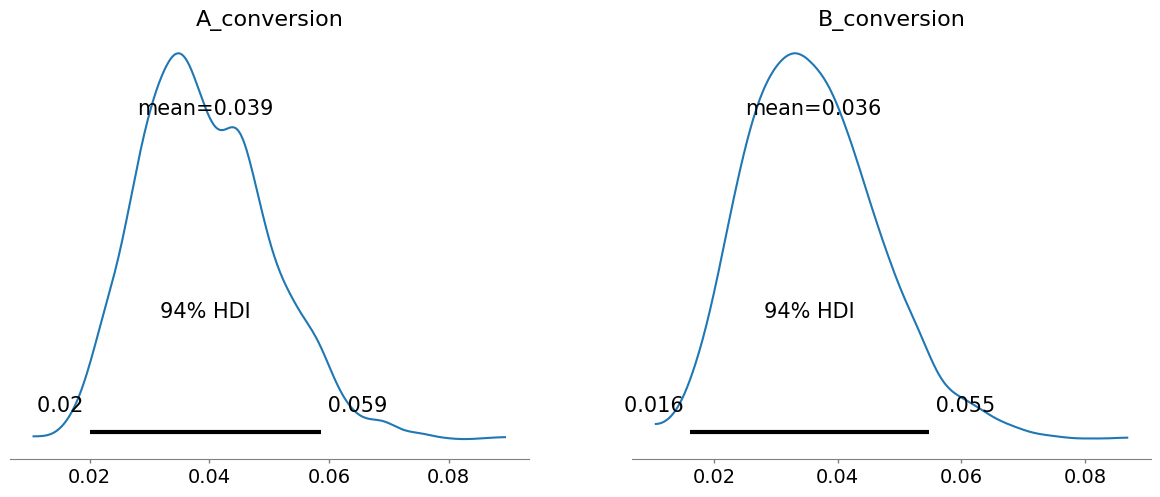

In [6]:
az.plot_posterior(trace)

In [7]:
samples_A = trace.posterior['A_conversion'].values
samples_B = trace.posterior['B_conversion'].values

In [8]:
print(f'Probability that B is better: {(samples_B > samples_A).mean():.1%}.')

Probability that B is better: 42.3%.


### **Публикация "Coding Bayesian AB Tests in Python to Boost your App or Website Conversions"**

In [9]:
n = 1000
obs_v1 = 680
obs_v2 = 700

In [10]:
with pm.Model() as model: # context management
    # define priors
    prior_v1 = pm.Beta('prior_v1', alpha=2, beta=2)
    prior_v2 = pm.Beta('prior_v2', alpha=2, beta=2)

    # define likelihood
    like_v1 = pm.Binomial('like_v1', n=n, p=prior_v1, observed=obs_v1)
    like_v2 = pm.Binomial('like_v2', n=n, p=prior_v2, observed=obs_v2)
    
    # define metrics
    pm.Deterministic('difference', prior_v2 - prior_v1)
    pm.Deterministic('relation', (prior_v2/prior_v1) - 1)

    # inference
    trace = pm.sample(draws=50000, step=pm.Metropolis(), initvals=pm.find_MAP(), progressbar=True)

array([[<Axes: title={'center': 'difference'}>,
        <Axes: title={'center': 'difference'}>],
       [<Axes: title={'center': 'relation'}>,
        <Axes: title={'center': 'relation'}>]], dtype=object)

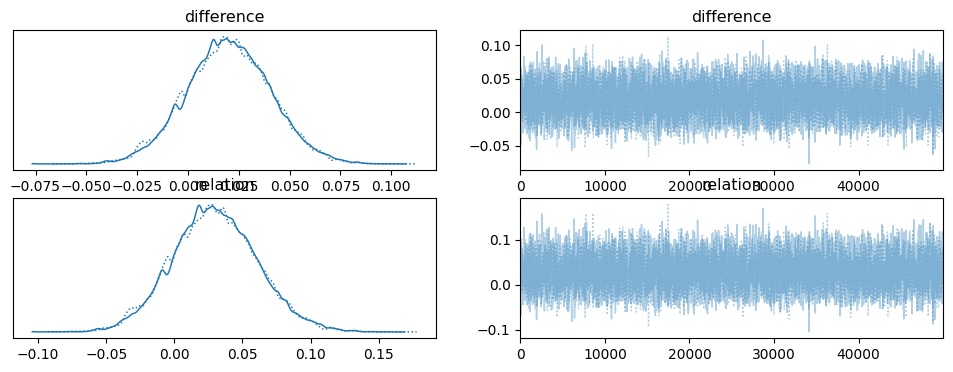

In [11]:
az.plot_trace(trace, var_names=['difference', 'relation'])

array([<Axes: title={'center': 'difference'}>,
       <Axes: title={'center': 'relation'}>], dtype=object)

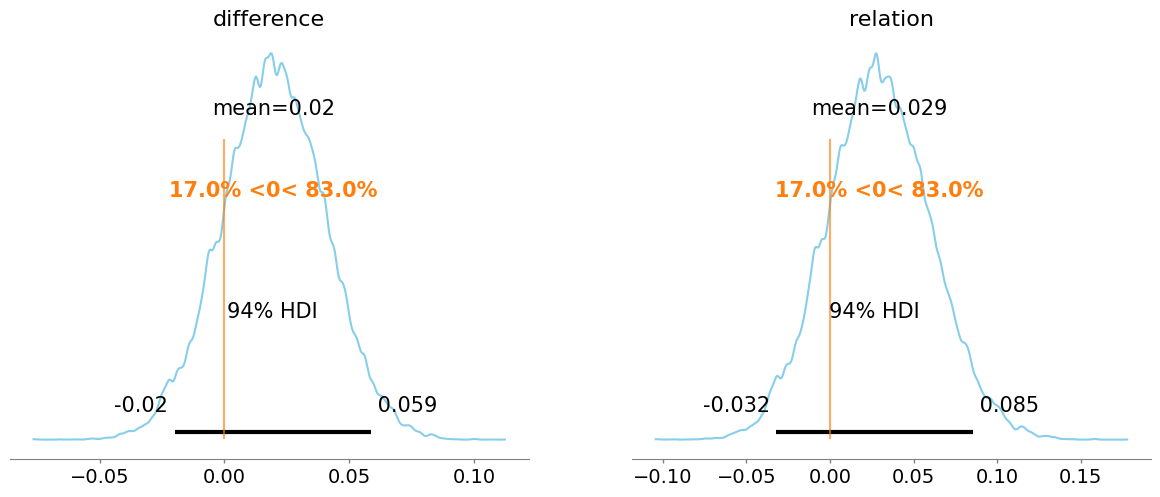

In [12]:
az.plot_posterior(trace, var_names=['difference', 'relation'], ref_val=0, color='#87ceeb')